**key features of PyTorch:**
- from the previous chapter - we saw that pytorch provides us with a scalable. Dynamic computational graphs are debugging friendly: PyTorch allows for interleaving the graph declaration and graph evaluation steps.

**PyTorch's Computation Graphs:**
- PyTorch performs its computations based on a Directed Acyclic Graph (DAG). We will see how these graphs can be defined for a simple arithmetic computation. Then, we will see the dynamic graph paradigm, as well as how the graph is created on the fly in pytorch

**Understanding Computation Graphs:**
- PyTorch relies on building a computation graph at its core, and it uses this computation graph to derive relationships between tensors from the input, all the way to the output. 
- The computation graph is simply a network of nodes. Each node resembles an operation, which applies a function to its input tensor or tensors and returns zero or more tensors as the output. PyTorch builds this computation graph and uses it to compute the gradients accordingly. 

**Creating a graph in PyTorch:**
- Let's look at a simple example that illustrates how to create a graph in pytorch for evaluating z = zx(a-b)+c. The variable a,b, and c are scalars (single numbers), and we define these as PyTorch tensors. To create the graph, we can simply define a regular Python function with a, b, and c as its input arguments, for example:

In [1]:
import torch

In [2]:
def compute_z(a,b,c):
    r1 = torch.sub(a,b)
    r2 = torch.mul(r1,2)
    z = torch.add(r2, c)
    return z

Now, to carry out the computation, we can simply call this function with tensor objects as funxtion arguments. 

In [4]:
print('Scalar Inputs:', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))

print('Rank 1 Inputs: ', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))

print('Rank 2 Inputs: ', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))

Scalar Inputs: tensor(1)
Rank 1 Inputs:  tensor([1])
Rank 2 Inputs:  tensor([[1]])


**PyTorch tensor objects for storing and updating model parameters:**
- We covered tensor objects in chapt. 12. In pytorch, a special tensor object foe which gradients need to be computed allows us to sotr and update the parameters of our model during training. Such a tensor can be created by assigning requires_grad to true on user specified initial values. Note: only tensors of floating point and complex dtype can require gradients. 

In [5]:
a = torch.tensor(3.14, requires_grad=True)
print(a)

tensor(3.1400, requires_grad=True)


In [6]:
b = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(b)

tensor([1., 2., 3.], requires_grad=True)


requires_grad is set to False by default - this value can be efficiently set to true by running requires_grad_().

method_() is an in-place method in pytorch that is used for operations without making a copy of the input. 

In [7]:
w = torch.tensor([1.0, 2.0, 3.0])
print(w.requires_grad)

False


In [8]:
w.requires_grad_()
print(w.requires_grad)

True


- Recall that for NN models - initializing model parameters with random weights is necessary to break the symmetry during backpropagation - otherwise, a multilayer NN would be no more useful than a single-layer NN like logistic regression. 

- Standard Initialization methods in the torch.nn.init module: pytorch.org/docs/stable/nn.init.html

- Let's look at how we can create a tensor with glorot initialization, which is a classic random initialization scheme. 

In [9]:
torch.manual_seed(1)

w = torch.empty(2,3)

In [11]:
w

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [13]:
import torch.nn as nn

In [14]:
nn.init.xavier_normal_(w)

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])

In [15]:
print(w)

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])


More practice - how to define two tensor objects inside the base nn.Module class:

In [16]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty(2,3, requires_grad=True)
        nn.init.xavier_normal_(self.w1)
        self.w2 = torch.empty(1,2,requires_grad=True)
        nn.init.xavier_normal_(self.w2)

The above two tensors can then be used as weights whose gradients will be computed via automatic differentiation.

**Computing gradients via automatic differentiation:**
- Optimizing NNs requires computing the gradients of the loss wrt the NN weights. This is required for optimization algorithms such as stochastic gradient descent (SGD). In addition, gradients have other applications - such as diagnosing the network to find out why a NN model is making a particular prediction for a test example. Therefore in this section - we cover how to compute gradients of a computation wrt its input variables:

**Computing gradients of the loss wrt trainable variables:**
- PyTorch supports automatic differentiation, which can be thought of as an implementation of the chain rule for computing gradients of nested functions. Note for the sake of simplicity, we use the term gradient to refer to both partial derivatives and gradients. 

- when we define a set of operations that results in some output or even intermediate tensors, PyTorch provides a context for calculating gradients of these computed tensors wrt its dependent nodes in the computation graph. To compute these gradients, we can call the backward method from the torch.autograd module. It computes the sum of gradients of the given tensor with regard to leaf nodes. 
- Let's work with a simple example

In [17]:
w = torch.tensor(1.0, requires_grad = True)
b = torch.tensor(0.5, requires_grad=True)

x = torch.tensor([1.4])
y = torch.tensor([2.1])
z = torch.add(torch.mul(w,x),b)

loss = (y-z).pow(2).sum()

In [18]:
loss.backward()

In [19]:
print('dL/dw: ', w.grad)
print('dL/db: ', b.grad)

dL/dw:  tensor(-0.5600)
dL/db:  tensor(-0.4000)


**Adversarial Examples:**
- Computing gradients of the loss with respect to the input example is used for generating adversarial examples (or adversarial attacks). In computer vision.

**simplifying implementations of common architectures via the torch.nn module:**
- Briefly look at another approach for conjuring those layers via nn.Sequential:

**Implementing models based on nn.Sequential:**
- With nn.Sequential the layers stored inside the model are connected in a cascaded way. In the following example, we will build a model with two densely (fully) connected layers:

In [20]:
model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU()
)
model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

We can further configure these layers, for example, by applying different activation functions, initializers, or regularization methods to the parameters.
In the following code - we configure the first fully connected layer by specifying the initial value distribution for the weight. Then we will configure the second fully connected layer by computing the L1 penalty term for the weight matrix:

In [23]:
model[2]

Linear(in_features=16, out_features=32, bias=True)

In [26]:
model[2].weight.abs().sum()

tensor(64.6429, grad_fn=<SumBackward0>)

In [27]:
nn.init.xavier_uniform_(model[0].weight)
l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum()

**Choosing a loss function:**
- Checking out the SGD optimizer and cross-entropy loss for binary classification:

In [28]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Next, we look at a more practical example: solving the classic XOR classification problem. First, we will use the nn.Sequential() class to build the model. Along the way, we'll also learn about the capacity of a model for handling nonlinear decision boundaries. Then cover building a model via nn.Module that will give us more flexibility and control over the layers of the network:

**Solving an XOR classification problem:**
- The XOR classification problem is a classic problem for analyzing the capacity of a model with regard to capturing the nonlinear decision boundary between 2 classes. We generate a toy dataset of 200 training examples with 2 features (xo,x1) drawn from a uniform distribution between [-1,1). Then,we assign the ground truth label for training example i, according to the following rule:
- We use half the data (100 training examples) for training and the remaining half for validation. The code for generating the data and splitting it into the training and validation datasets is as follows: 

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
torch.manual_seed(1)
np.random.seed(1)

In [31]:
x = np.random.uniform(low=-1, high=1, size=(200,2))
y = np.ones(len(x))

y[x[:,0]*x[:,1]<0]=0

In [32]:
n_train = 100
x_train = torch.tensor(x[:n_train,:], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:,:], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

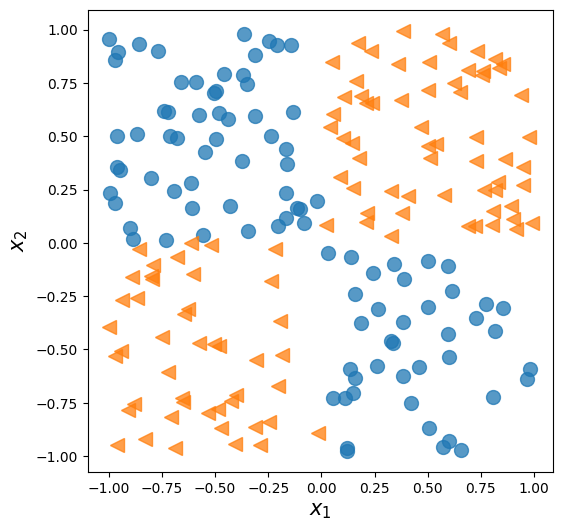

In [34]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(x[y==0,0],x[y==0,1],'o',alpha=0.75, markersize=10)
ax.plot(x[y==1,0],x[y==1,1],'<',alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

The code results in the scatterplot of the training and validation examples, shown with different markers based on their class label.

In the previous subsection, we convered the essential tools that we need to implement a classifier in PyTorch. 

Baseline model:

In [36]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

after defining the model, we initialize the binary cross entropy loss function and the SGD optimizer:

In [37]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

Next, we create a dataloader that uses a batch size of 2 for the train data:

In [38]:
from torch.utils.data import DataLoader, TensorDataset

In [39]:
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)